In [ ]:
# pip install torch scikit-learn scipy matplotlib numpy

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving SP500_data_fixed.xlsx to SP500_data_fixed.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
def load_and_preprocess_data(real_file_path, synthetic_file_path):
    """
    Load and preprocess your specific data files - corrected to use prices

    Args:
        real_file_path: Path to SP500_data_fixed.xlsx
        synthetic_file_path: Path to synthetic_data_BOTH.xlsx

    Returns:
        real_data: numpy array of log returns
        synthetic_data: numpy array of log returns
    """

    # Load real data from SP500 file
    real_df = pd.read_excel(real_file_path)

    print(f"Real data columns: {real_df.columns.tolist()}")
    print(f"Real data shape: {real_df.shape}")
    print(f"First few rows:\n{real_df.head()}")

    # Check if Date column exists and convert
    if 'Date' in real_df.columns:
        real_df['Date'] = pd.to_datetime(real_df['Date'])
        start_date = datetime(2013, 1, 1)
        end_date = datetime(2020, 1, 1)

        # Filter by date range
        mask = (real_df['Date'] >= start_date) & (real_df['Date'] < end_date)
        real_filtered = real_df[mask]
    else:
        # If no Date column, use all data
        real_filtered = real_df

    # Find META and TROW columns
    meta_col = None
    trow_col = None

    for col in real_filtered.columns:
        if 'META' in str(col).upper():
            meta_col = col
        elif 'TROW' in str(col).upper():
            trow_col = col

    if meta_col is None or trow_col is None:
        # If specific columns not found, use first two numeric columns
        numeric_cols = real_filtered.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) >= 2:
            meta_col = numeric_cols[0]
            trow_col = numeric_cols[1]
            print(f"Using columns: {meta_col} and {trow_col}")
        else:
            raise ValueError("Could not find at least 2 numeric columns in real data")

    # Extract PRICE data from real data
    real_prices = real_filtered[[meta_col, trow_col]].copy()
    real_prices = real_prices.dropna()

    # Calculate log returns for real data
    real_returns = real_prices.pct_change().dropna()
    real_log_returns = np.log(real_returns + 1)

    # Load synthetic data - READ THE PRICES SHEET (sheet_name=1 or 'Prices')
    try:
        synthetic_excel = pd.ExcelFile(synthetic_file_path)
        print(f"Synthetic file sheets: {synthetic_excel.sheet_names}")

        # Load the PRICES sheet (second sheet)
        synthetic_prices_df = pd.read_excel(synthetic_file_path, sheet_name='Prices')  # or sheet_name=1

        print(f"Synthetic prices shape: {synthetic_prices_df.shape}")
        print(f"Synthetic prices columns: {synthetic_prices_df.columns.tolist()}")
        print(f"First few rows of synthetic prices:\n{synthetic_prices_df.head()}")

        # Extract META and TROW price columns
        synthetic_prices = synthetic_prices_df[['META', 'TROW']].copy()
        synthetic_prices = synthetic_prices.dropna()

        # Calculate log returns from synthetic PRICES
        synthetic_returns = synthetic_prices.pct_change().dropna()
        synthetic_log_returns = np.log(synthetic_returns + 1)

    except Exception as e:
        print(f"Error reading synthetic file: {e}")
        # Create dummy synthetic data for testing
        synthetic_log_returns = np.random.normal(0, 0.02, (len(real_log_returns), 2))
        return real_log_returns.values, synthetic_log_returns

    # Ensure both datasets have the same length
    min_length = min(len(real_log_returns), len(synthetic_log_returns))
    real_log_returns = real_log_returns.iloc[:min_length]
    synthetic_log_returns = synthetic_log_returns.iloc[:min_length]

    print(f"Final real log returns shape: {real_log_returns.shape}")
    print(f"Final synthetic log returns shape: {synthetic_log_returns.shape}")

    return real_log_returns.values, synthetic_log_returns.values

In [ ]:
# Test the corrected data loading
try:
    real_data, synthetic_data = load_and_preprocess_data(
        'SP500_data_fixed.xlsx',
        'synthetic_data_BOTH.xlsx'
    )

    print(f"Successfully loaded data!")
    print(f"Real log returns shape: {real_data.shape}")
    print(f"Synthetic log returns shape: {synthetic_data.shape}")

    # Check the data ranges
    print(f"Real returns range: [{real_data.min():.6f}, {real_data.max():.6f}]")
    print(f"Synthetic returns range: [{synthetic_data.min():.6f}, {synthetic_data.max():.6f}]")

except Exception as e:
    print(f"Error in data loading: {e}")
    import traceback
    traceback.print_exc()


Real data columns: ['Date', 'HPE', 'BSX', 'NCLH', 'MAS', 'OMC', 'MRK', 'ABNB', 'DUK', 'SNA', 'TROW', 'ORCL', 'DAL', 'FRT', 'MO', 'WAB', 'VZ', 'HIG', 'PKG', 'DHI', 'CAT', 'MTD', 'WYNN', 'WBD', 'NEM', 'CVX', 'AXON', 'ROL', 'CL', 'JBL', 'TXT', 'MHK', 'LYB', 'DPZ', 'GRMN', 'TSCO', 'BK', 'PCAR', 'META', 'CNP', 'AKAM', 'PEP', 'KDP', 'ICE', 'PRU', 'SLB', 'NWSA', 'RSG', 'FOX', 'CDW', 'ANET', 'TGT', 'EW', 'MRNA', 'EQR', 'BDX', 'ACGL', 'FI', 'AES', 'MDLZ', 'FFIV', 'INTU', 'MMC', 'XYL', 'MCK', 'MOS', 'COP', 'EA', 'VRSK', 'NDSN', 'SPGI', 'GS', 'QCOM', 'MKTX', 'ACN', 'ZBH', 'ANSS', 'EG', 'HAL', 'IT', 'GOOG', 'IP', 'RJF', 'ISRG', 'GEN', 'STE', 'VMC', 'LKQ', 'F', 'TPR', 'LRCX', 'WDC', 'XEL', 'DVA', 'LII', 'AON', 'CBRE', 'FICO', 'GLW', 'CMG', 'MAA', 'CME', 'TSLA', 'CMI', 'SJM', 'SCHW', 'SBUX', 'TRGP', 'PAYX', 'CPRT', 'FITB', 'MTB', 'NRG', 'CVS', 'EXC', 'ZTS', 'UNP', 'NFLX', 'NWS', 'CPAY', 'PHM', 'INVH', 'BLDR', 'PODD', 'CHTR', 'WAT', 'LYV', 'CTAS', 'DELL', 'IEX', 'STLD', 'SYY', 'LVS', 'AZO', 'PYPL', '

In [ ]:
def normalize_data(data):
    """
    Normalize data to [0, 1] range as required by TSGBench
    """
    if len(data) == 0:
        raise ValueError("Empty data array")

    min_vals = np.min(data, axis=(0, 1), keepdims=True)
    max_vals = np.max(data, axis=(0, 1), keepdims=True)

    # Avoid division by zero
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1

    normalized_data = (data - min_vals) / range_vals

    # Ensure values are in [0, 1] range
    normalized_data = np.clip(normalized_data, 0, 1)

    return normalized_data, min_vals, max_vals

In [ ]:
def create_time_series_windows(data, window_length=24, stride=1):
    """
    Convert time series data into overlapping windows for TSGBench format

    Args:
        data: numpy array of shape (time_steps, n_features)
        window_length: length of each window
        stride: step size between windows

    Returns:
        windowed_data: numpy array of shape (n_windows, window_length, n_features)
    """
    if len(data) < window_length:
        raise ValueError(f"Data length ({len(data)}) is less than window length ({window_length})")

    n_windows = (len(data) - window_length) // stride + 1
    windows = []

    for i in range(0, n_windows * stride, stride):
        if i + window_length <= len(data):
            windows.append(data[i:i + window_length])

    return np.array(windows)


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 2)  # Binary classification

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use last time step
        return out

def discriminative_score(real_data, synthetic_data, num_runs=5):
    """
    Compute Discriminative Score using LSTM classifier
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        num_runs: number of runs for averaging
    Returns:
        ds_score: mean classification error
        ds_std: standard deviation across runs
    """
    scores = []

    for run in range(num_runs):
        # Prepare data
        X = np.concatenate([real_data, synthetic_data], axis=0)
        y = np.concatenate([np.ones(len(real_data)), np.zeros(len(synthetic_data))])

        # Convert to tensors
        X_tensor = torch.FloatTensor(X)
        y_tensor = torch.LongTensor(y)

        # Split train/test
        split_idx = int(0.8 * len(X))
        indices = np.random.permutation(len(X))
        train_idx, test_idx = indices[:split_idx], indices[split_idx:]

        train_dataset = TensorDataset(X_tensor[train_idx], y_tensor[train_idx])
        test_dataset = TensorDataset(X_tensor[test_idx], y_tensor[test_idx])

        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=32)

        # Initialize model
        model = LSTMClassifier(X.shape[2])
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())

        # Train
        model.train()
        for epoch in range(50):
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

        # Test
        model.eval()
        predictions = []
        true_labels = []

        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                outputs = model(batch_X)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())
                true_labels.extend(batch_y.numpy())

        accuracy = accuracy_score(true_labels, predictions)
        error_rate = 1 - accuracy
        scores.append(error_rate)

    return np.mean(scores), np.std(scores)


In [ ]:
class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, output_size=1):
        super(LSTMPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use last time step
        # Handle dimension mismatch
        if out.dim() == 1 and self.fc.out_features > 1:
            out = out.unsqueeze(0)
        return out


def predictive_score(real_data, synthetic_data, prediction_type='next_step', num_runs=5):
    """
    Compute Predictive Score
    """
    scores = []

    for run in range(num_runs):
        if prediction_type == 'next_step':
            # Prepare data for next-step prediction
            X_train = synthetic_data[:, :-1, :]  # All but last timestep
            y_train = synthetic_data[:, -1, :]   # Last timestep

            X_test = real_data[:, :-1, :]
            y_test = real_data[:, -1, :]

        else:  # entire_sequence
            # Use first half to predict second half
            seq_len = synthetic_data.shape[1]
            mid_point = seq_len // 2

            X_train = synthetic_data[:, :mid_point, :]
            y_train = synthetic_data[:, mid_point:, :].reshape(len(synthetic_data), -1)

            X_test = real_data[:, :mid_point, :]
            y_test = real_data[:, mid_point:, :].reshape(len(real_data), -1)

        # Convert to tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train)
        X_test_tensor = torch.FloatTensor(X_test)
        y_test_tensor = torch.FloatTensor(y_test)

        # Initialize model
        output_size = y_train.shape[1] if len(y_train.shape) > 1 else 1
        model = LSTMPredictor(X_train.shape[2], output_size=output_size)
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters())

        # Train on synthetic data
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

        model.train()
        for epoch in range(50):
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

        # Test on real data
        model.eval()
        with torch.no_grad():
            predictions = model(X_test_tensor)
            mae = torch.mean(torch.abs(predictions - y_test_tensor)).item()
            scores.append(mae)

    return np.mean(scores), np.std(scores)

In [ ]:
from scipy.linalg import sqrtm

def contextual_fid(real_data, synthetic_data, embedding_model=None):
    """
    Compute Contextual-FID using time series embeddings
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        embedding_model: pre-trained embedding model (e.g., ts2vec)
    """
    if embedding_model is None:
        # Simple embedding using mean and std across time dimension
        real_embeddings = np.concatenate([
            np.mean(real_data, axis=1),
            np.std(real_data, axis=1)
        ], axis=1)

        synthetic_embeddings = np.concatenate([
            np.mean(synthetic_data, axis=1),
            np.std(synthetic_data, axis=1)
        ], axis=1)
    else:
        # Use pre-trained embedding model
        real_embeddings = embedding_model.encode(real_data)
        synthetic_embeddings = embedding_model.encode(synthetic_data)

    # Calculate FID
    mu_real = np.mean(real_embeddings, axis=0)
    mu_synthetic = np.mean(synthetic_embeddings, axis=0)

    sigma_real = np.cov(real_embeddings, rowvar=False)
    sigma_synthetic = np.cov(synthetic_embeddings, rowvar=False)

    # Calculate FID score
    diff = mu_real - mu_synthetic
    covmean = sqrtm(sigma_real.dot(sigma_synthetic))

    if np.iscomplexobj(covmean):
        covmean = covmean.real

    fid = diff.dot(diff) + np.trace(sigma_real + sigma_synthetic - 2 * covmean)
    return fid


In [ ]:
def marginal_distribution_difference(real_data, synthetic_data, n_bins=50):
    """
    Compute Marginal Distribution Difference
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        n_bins: number of histogram bins
    """
    mdd_scores = []

    for feature_idx in range(real_data.shape[2]):
        for time_idx in range(real_data.shape[1]):
            real_values = real_data[:, time_idx, feature_idx]
            synthetic_values = synthetic_data[:, time_idx, feature_idx]

            # Create histogram bins based on real data
            bin_edges = np.histogram_bin_edges(real_values, bins=n_bins)

            # Calculate histograms
            real_hist, _ = np.histogram(real_values, bins=bin_edges, density=True)
            synthetic_hist, _ = np.histogram(synthetic_values, bins=bin_edges, density=True)

            # Calculate absolute difference
            mdd = np.mean(np.abs(real_hist - synthetic_hist))
            mdd_scores.append(mdd)

    return np.mean(mdd_scores)


In [ ]:
def autocorrelation_difference(real_data, synthetic_data, max_lag=20):
    """
    Compute AutoCorrelation Difference
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        max_lag: maximum lag for autocorrelation
    """
    def compute_autocorr(data, max_lag):
        autocorrs = []
        for i in range(data.shape[0]):  # For each sample
            for j in range(data.shape[2]):  # For each feature
                series = data[i, :, j]
                autocorr = np.correlate(series, series, mode='full')
                autocorr = autocorr[len(autocorr)//2:]
                autocorr = autocorr[:max_lag+1] / autocorr[0]  # Normalize
                autocorrs.append(autocorr)
        return np.array(autocorrs)

    real_autocorr = compute_autocorr(real_data, max_lag)
    synthetic_autocorr = compute_autocorr(synthetic_data, max_lag)

    # Calculate mean autocorrelation across all samples and features
    real_mean_autocorr = np.mean(real_autocorr, axis=0)
    synthetic_mean_autocorr = np.mean(synthetic_autocorr, axis=0)

    acd = np.mean(np.abs(real_mean_autocorr - synthetic_mean_autocorr))
    return acd


In [ ]:
from scipy.stats import skew

def skewness_difference(real_data, synthetic_data):
    """
    Compute Skewness Difference
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
    """
    # Flatten data for each feature
    real_flat = real_data.reshape(-1, real_data.shape[2])
    synthetic_flat = synthetic_data.reshape(-1, synthetic_data.shape[2])

    skewness_diffs = []
    for feature_idx in range(real_data.shape[2]):
        real_skew = skew(real_flat[:, feature_idx])
        synthetic_skew = skew(synthetic_flat[:, feature_idx])
        skewness_diffs.append(abs(real_skew - synthetic_skew))

    return np.mean(skewness_diffs)


In [ ]:
from scipy.stats import kurtosis

def kurtosis_difference(real_data, synthetic_data):
    """
    Compute Kurtosis Difference
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
    """
    # Flatten data for each feature
    real_flat = real_data.reshape(-1, real_data.shape[2])
    synthetic_flat = synthetic_data.reshape(-1, synthetic_data.shape[2])

    kurtosis_diffs = []
    for feature_idx in range(real_data.shape[2]):
        real_kurt = kurtosis(real_flat[:, feature_idx])
        synthetic_kurt = kurtosis(synthetic_flat[:, feature_idx])
        kurtosis_diffs.append(abs(real_kurt - synthetic_kurt))

    return np.mean(kurtosis_diffs)


In [ ]:
def euclidean_distance(real_data, synthetic_data):
    """
    Compute Euclidean Distance between real and synthetic data
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
    """
    # Ensure same number of samples
    min_samples = min(len(real_data), len(synthetic_data))
    real_subset = real_data[:min_samples]
    synthetic_subset = synthetic_data[:min_samples]

    # Calculate Euclidean distance for each pair
    distances = []
    for i in range(min_samples):
        dist = np.sqrt(np.sum((real_subset[i] - synthetic_subset[i]) ** 2))
        distances.append(dist)

    return np.mean(distances)


In [ ]:
def dtw_distance(x, y):
    """
    Compute DTW distance between two time series
    """
    n, m = len(x), len(y)
    dtw_matrix = np.full((n + 1, m + 1), np.inf)
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(x[i-1] - y[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],      # insertion
                                         dtw_matrix[i, j-1],      # deletion
                                         dtw_matrix[i-1, j-1])    # match

    return dtw_matrix[n, m]

def dynamic_time_warping(real_data, synthetic_data):
    """
    Compute mean DTW distance between real and synthetic data
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
    """
    min_samples = min(len(real_data), len(synthetic_data))
    dtw_distances = []

    for i in range(min_samples):
        for j in range(real_data.shape[2]):  # For each feature
            real_series = real_data[i, :, j]
            synthetic_series = synthetic_data[i, :, j]
            dtw_dist = dtw_distance(real_series, synthetic_series)
            dtw_distances.append(dtw_dist)

    return np.mean(dtw_distances)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(real_data, synthetic_data, save_path=None):
    """
    Create t-SNE visualization of real vs synthetic data
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        save_path: path to save the plot
    """
    # Flatten data for t-SNE
    real_flat = real_data.reshape(len(real_data), -1)
    synthetic_flat = synthetic_data.reshape(len(synthetic_data), -1)

    # Combine data
    combined_data = np.vstack([real_flat, synthetic_flat])
    labels = np.hstack([np.ones(len(real_data)), np.zeros(len(synthetic_data))])

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    embedded = tsne.fit_transform(combined_data)

    # Plot
    plt.figure(figsize=(10, 8))
    real_mask = labels == 1
    synthetic_mask = labels == 0

    plt.scatter(embedded[real_mask, 0], embedded[real_mask, 1],
                c='blue', label='Real', alpha=0.6)
    plt.scatter(embedded[synthetic_mask, 0], embedded[synthetic_mask, 1],
                c='orange', label='Synthetic', alpha=0.6)

    plt.legend()
    plt.title('t-SNE Visualization: Real vs Synthetic Data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')

    if save_path:
        plt.savefig(save_path)
    plt.show()


In [ ]:
def distribution_plot(real_data, synthetic_data, feature_idx=0, save_path=None):
    """
    Create distribution comparison plot
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        feature_idx: which feature to plot
        save_path: path to save the plot
    """
    # Flatten the selected feature
    real_values = real_data[:, :, feature_idx].flatten()
    synthetic_values = synthetic_data[:, :, feature_idx].flatten()

    plt.figure(figsize=(12, 6))

    # Plot histograms
    plt.hist(real_values, bins=50, alpha=0.7, label='Real', color='blue', density=True)
    plt.hist(synthetic_values, bins=50, alpha=0.7, label='Synthetic', color='orange', density=True)

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Distribution Comparison - Feature {feature_idx}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    if save_path:
        plt.savefig(save_path)
    plt.show()


In [ ]:
def run_complete_tsgbench_evaluation(real_file_path, synthetic_file_path, window_length=24):
    """
    Run complete TSGBench evaluation on your data

    Args:
        real_file_path: Path to SP500_data_fixed.xlsx
        synthetic_file_path: Path to synthetic_data_BOTH.xlsx
        window_length: Length of time series windows

    Returns:
        results: Dictionary containing all evaluation metrics
    """

    print("Loading and preprocessing data...")

    # Load data
    real_returns, synthetic_returns = load_and_preprocess_data(real_file_path, synthetic_file_path)

    print(f"Real data shape: {real_returns.shape}")
    print(f"Synthetic data shape: {synthetic_returns.shape}")

    # Create time series windows
    real_windowed = create_time_series_windows(real_returns, window_length)
    synthetic_windowed = create_time_series_windows(synthetic_returns, window_length)

    print(f"Real windowed shape: {real_windowed.shape}")
    print(f"Synthetic windowed shape: {synthetic_windowed.shape}")

    # Normalize data
    real_normalized, real_min, real_max = normalize_data(real_windowed)
    synthetic_normalized, synth_min, synth_max = normalize_data(synthetic_windowed)

    print("Running TSGBench evaluation...")

    # Initialize results dictionary
    results = {}

    # Model-based measures
    print("Computing Model-based Measures...")
    try:
        ds_mean, ds_std = discriminative_score(real_normalized, synthetic_normalized, num_runs=3)
        results['DS'] = {'mean': ds_mean, 'std': ds_std}
        print(f"Discriminative Score: {ds_mean:.4f} ± {ds_std:.4f}")
    except Exception as e:
        print(f"Error computing DS: {e}")
        results['DS'] = {'mean': np.nan, 'std': np.nan}

    try:
        ps_mean, ps_std = predictive_score(real_normalized, synthetic_normalized, num_runs=3)
        results['PS'] = {'mean': ps_mean, 'std': ps_std}
        print(f"Predictive Score: {ps_mean:.4f} ± {ps_std:.4f}")
    except Exception as e:
        print(f"Error computing PS: {e}")
        results['PS'] = {'mean': np.nan, 'std': np.nan}

    try:
        c_fid = contextual_fid(real_normalized, synthetic_normalized)
        results['C-FID'] = c_fid
        print(f"Contextual-FID: {c_fid:.4f}")
    except Exception as e:
        print(f"Error computing C-FID: {e}")
        results['C-FID'] = np.nan

    # Feature-based measures
    print("Computing Feature-based Measures...")
    try:
        mdd = marginal_distribution_difference(real_normalized, synthetic_normalized)
        results['MDD'] = mdd
        print(f"Marginal Distribution Difference: {mdd:.4f}")
    except Exception as e:
        print(f"Error computing MDD: {e}")
        results['MDD'] = np.nan

    try:
        acd = autocorrelation_difference(real_normalized, synthetic_normalized)
        results['ACD'] = acd
        print(f"AutoCorrelation Difference: {acd:.4f}")
    except Exception as e:
        print(f"Error computing ACD: {e}")
        results['ACD'] = np.nan

    try:
        sd = skewness_difference(real_normalized, synthetic_normalized)
        results['SD'] = sd
        print(f"Skewness Difference: {sd:.4f}")
    except Exception as e:
        print(f"Error computing SD: {e}")
        results['SD'] = np.nan

    try:
        kd = kurtosis_difference(real_normalized, synthetic_normalized)
        results['KD'] = kd
        print(f"Kurtosis Difference: {kd:.4f}")
    except Exception as e:
        print(f"Error computing KD: {e}")
        results['KD'] = np.nan

    # Distance-based measures
    print("Computing Distance-based Measures...")
    try:
        ed = euclidean_distance(real_normalized, synthetic_normalized)
        results['ED'] = ed
        print(f"Euclidean Distance: {ed:.4f}")
    except Exception as e:
        print(f"Error computing ED: {e}")
        results['ED'] = np.nan

    try:
        dtw = dynamic_time_warping(real_normalized, synthetic_normalized)
        results['DTW'] = dtw
        print(f"Dynamic Time Warping: {dtw:.4f}")
    except Exception as e:
        print(f"Error computing DTW: {e}")
        results['DTW'] = np.nan

    # Create visualizations
    print("Creating Visualizations...")
    try:
        create_comprehensive_plots(real_normalized, synthetic_normalized, real_returns, synthetic_returns)
    except Exception as e:
        print(f"Error creating visualizations: {e}")

    return results, real_normalized, synthetic_normalized

def create_comprehensive_plots(real_normalized, synthetic_normalized, real_raw, synthetic_raw):
    """
    Create comprehensive visualization plots
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # t-SNE visualization
    try:
        from sklearn.manifold import TSNE

        # Flatten data for t-SNE
        real_flat = real_normalized.reshape(len(real_normalized), -1)
        synthetic_flat = synthetic_normalized.reshape(len(synthetic_normalized), -1)

        # Sample data if too large
        max_samples = 1000
        if len(real_flat) > max_samples:
            indices = np.random.choice(len(real_flat), max_samples, replace=False)
            real_flat = real_flat[indices]
            synthetic_flat = synthetic_flat[indices]

        combined_data = np.vstack([real_flat, synthetic_flat])
        labels = np.hstack([np.ones(len(real_flat)), np.zeros(len(synthetic_flat))])

        tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(combined_data)//4))
        embedded = tsne.fit_transform(combined_data)

        real_mask = labels == 1
        synthetic_mask = labels == 0

        axes[0, 0].scatter(embedded[real_mask, 0], embedded[real_mask, 1],
                          c='blue', label='Real', alpha=0.6, s=20)
        axes[0, 0].scatter(embedded[synthetic_mask, 0], embedded[synthetic_mask, 1],
                          c='orange', label='Synthetic', alpha=0.6, s=20)
        axes[0, 0].set_title('t-SNE Visualization')
        axes[0, 0].legend()

    except Exception as e:
        axes[0, 0].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center')
        axes[0, 0].set_title('t-SNE Visualization (Error)')

    # Distribution plots for each feature
    for feature_idx in range(min(2, real_normalized.shape[2])):
        real_values = real_normalized[:, :, feature_idx].flatten()
        synthetic_values = synthetic_normalized[:, :, feature_idx].flatten()

        feature_name = 'META' if feature_idx == 0 else 'TROW'

        axes[0, feature_idx + 1].hist(real_values, bins=50, alpha=0.7,
                                     label='Real', color='blue', density=True)
        axes[0, feature_idx + 1].hist(synthetic_values, bins=50, alpha=0.7,
                                     label='Synthetic', color='orange', density=True)
        axes[0, feature_idx + 1].set_title(f'{feature_name} Distribution')
        axes[0, feature_idx + 1].legend()
        axes[0, feature_idx + 1].grid(True, alpha=0.3)

    # Time series plots
    for feature_idx in range(min(2, real_raw.shape[1])):
        feature_name = 'META' if feature_idx == 0 else 'TROW'

        # Plot first 200 points for clarity
        plot_length = min(200, len(real_raw))

        axes[1, feature_idx].plot(real_raw[:plot_length, feature_idx],
                                 label='Real', color='blue', alpha=0.8)
        axes[1, feature_idx].plot(synthetic_raw[:plot_length, feature_idx],
                                 label='Synthetic', color='orange', alpha=0.8)
        axes[1, feature_idx].set_title(f'{feature_name} Time Series')
        axes[1, feature_idx].legend()
        axes[1, feature_idx].grid(True, alpha=0.3)

    # Autocorrelation comparison
    try:
        max_lag = 20
        real_autocorr = []
        synthetic_autocorr = []

        for feature_idx in range(real_normalized.shape[2]):
            # Average autocorrelation across all samples
            real_series = real_normalized[:, :, feature_idx].mean(axis=0)
            synthetic_series = synthetic_normalized[:, :, feature_idx].mean(axis=0)

            real_ac = np.correlate(real_series, real_series, mode='full')
            real_ac = real_ac[len(real_ac)//2:][:max_lag+1]
            real_ac = real_ac / real_ac[0]

            synthetic_ac = np.correlate(synthetic_series, synthetic_series, mode='full')
            synthetic_ac = synthetic_ac[len(synthetic_ac)//2:][:max_lag+1]
            synthetic_ac = synthetic_ac / synthetic_ac[0]

            real_autocorr.append(real_ac)
            synthetic_autocorr.append(synthetic_ac)

        # Plot average autocorrelation
        real_avg = np.mean(real_autocorr, axis=0)
        synthetic_avg = np.mean(synthetic_autocorr, axis=0)

        axes[1, 2].plot(range(len(real_avg)), real_avg, 'b-', label='Real', linewidth=2)
        axes[1, 2].plot(range(len(synthetic_avg)), synthetic_avg, 'r--', label='Synthetic', linewidth=2)
        axes[1, 2].set_title('Autocorrelation Comparison')
        axes[1, 2].set_xlabel('Lag')
        axes[1, 2].set_ylabel('Autocorrelation')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)

    except Exception as e:
        axes[1, 2].text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center')
        axes[1, 2].set_title('Autocorrelation (Error)')

    plt.tight_layout()
    plt.savefig('tsgbench_evaluation_results.png', dpi=300, bbox_inches='tight')
    plt.show()

def print_results_summary(results):
    """
    Print a formatted summary of all results
    """
    print("\n" + "="*60)
    print("TSGBench EVALUATION RESULTS SUMMARY")
    print("="*60)

    print("\nMODEL-BASED MEASURES:")
    print(f"  Discriminative Score (DS):     {results['DS']['mean']:.4f} ± {results['DS']['std']:.4f}")
    print(f"  Predictive Score (PS):         {results['PS']['mean']:.4f} ± {results['PS']['std']:.4f}")
    print(f"  Contextual-FID (C-FID):        {results['C-FID']:.4f}")

    print("\nFEATURE-BASED MEASURES:")
    print(f"  Marginal Distribution Diff:    {results['MDD']:.4f}")
    print(f"  AutoCorrelation Difference:    {results['ACD']:.4f}")
    print(f"  Skewness Difference:           {results['SD']:.4f}")
    print(f"  Kurtosis Difference:           {results['KD']:.4f}")

    print("\nDISTANCE-BASED MEASURES:")
    print(f"  Euclidean Distance:            {results['ED']:.4f}")
    print(f"  Dynamic Time Warping:          {results['DTW']:.4f}")

    print("\nINTERPRETATION:")
    print("  - Lower values indicate better performance")
    print("  - DS and PS around 0.5 suggest the discriminator cannot distinguish real from synthetic")
    print("  - Feature-based measures assess statistical similarity")
    print("  - Distance-based measures provide direct similarity quantification")
    print("="*60)

In [ ]:
def evaluate_tsg_methods(real_data, synthetic_data, num_runs=5):
    """
    Complete evaluation suite for TSG methods
    Args:
        real_data: numpy array of shape (n_samples, seq_len, n_features)
        synthetic_data: numpy array of shape (n_samples, seq_len, n_features)
        num_runs: number of runs for stochastic measures
    Returns:
        results: dictionary containing all evaluation metrics
    """
    results = {}

    print("Computing Model-based Measures...")
    # Model-based measures
    ds_mean, ds_std = discriminative_score(real_data, synthetic_data, num_runs)
    ps_mean, ps_std = predictive_score(real_data, synthetic_data, num_runs=num_runs)
    c_fid = contextual_fid(real_data, synthetic_data)

    results['DS'] = {'mean': ds_mean, 'std': ds_std}
    results['PS'] = {'mean': ps_mean, 'std': ps_std}
    results['C-FID'] = c_fid

    print("Computing Feature-based Measures...")
    # Feature-based measures
    results['MDD'] = marginal_distribution_difference(real_data, synthetic_data)
    results['ACD'] = autocorrelation_difference(real_data, synthetic_data)
    results['SD'] = skewness_difference(real_data, synthetic_data)
    results['KD'] = kurtosis_difference(real_data, synthetic_data)

    print("Computing Distance-based Measures...")
    # Distance-based measures
    results['ED'] = euclidean_distance(real_data, synthetic_data)
    results['DTW'] = dynamic_time_warping(real_data, synthetic_data)

    print("Creating Visualizations...")
    # Visualizations
    tsne_visualization(real_data, synthetic_data)
    distribution_plot(real_data, synthetic_data)

    return results

Loading and preprocessing data...
Real data columns: ['Date', 'HPE', 'BSX', 'NCLH', 'MAS', 'OMC', 'MRK', 'ABNB', 'DUK', 'SNA', 'TROW', 'ORCL', 'DAL', 'FRT', 'MO', 'WAB', 'VZ', 'HIG', 'PKG', 'DHI', 'CAT', 'MTD', 'WYNN', 'WBD', 'NEM', 'CVX', 'AXON', 'ROL', 'CL', 'JBL', 'TXT', 'MHK', 'LYB', 'DPZ', 'GRMN', 'TSCO', 'BK', 'PCAR', 'META', 'CNP', 'AKAM', 'PEP', 'KDP', 'ICE', 'PRU', 'SLB', 'NWSA', 'RSG', 'FOX', 'CDW', 'ANET', 'TGT', 'EW', 'MRNA', 'EQR', 'BDX', 'ACGL', 'FI', 'AES', 'MDLZ', 'FFIV', 'INTU', 'MMC', 'XYL', 'MCK', 'MOS', 'COP', 'EA', 'VRSK', 'NDSN', 'SPGI', 'GS', 'QCOM', 'MKTX', 'ACN', 'ZBH', 'ANSS', 'EG', 'HAL', 'IT', 'GOOG', 'IP', 'RJF', 'ISRG', 'GEN', 'STE', 'VMC', 'LKQ', 'F', 'TPR', 'LRCX', 'WDC', 'XEL', 'DVA', 'LII', 'AON', 'CBRE', 'FICO', 'GLW', 'CMG', 'MAA', 'CME', 'TSLA', 'CMI', 'SJM', 'SCHW', 'SBUX', 'TRGP', 'PAYX', 'CPRT', 'FITB', 'MTB', 'NRG', 'CVS', 'EXC', 'ZTS', 'UNP', 'NFLX', 'NWS', 'CPAY', 'PHM', 'INVH', 'BLDR', 'PODD', 'CHTR', 'WAT', 'LYV', 'CTAS', 'DELL', 'IEX', 'STL

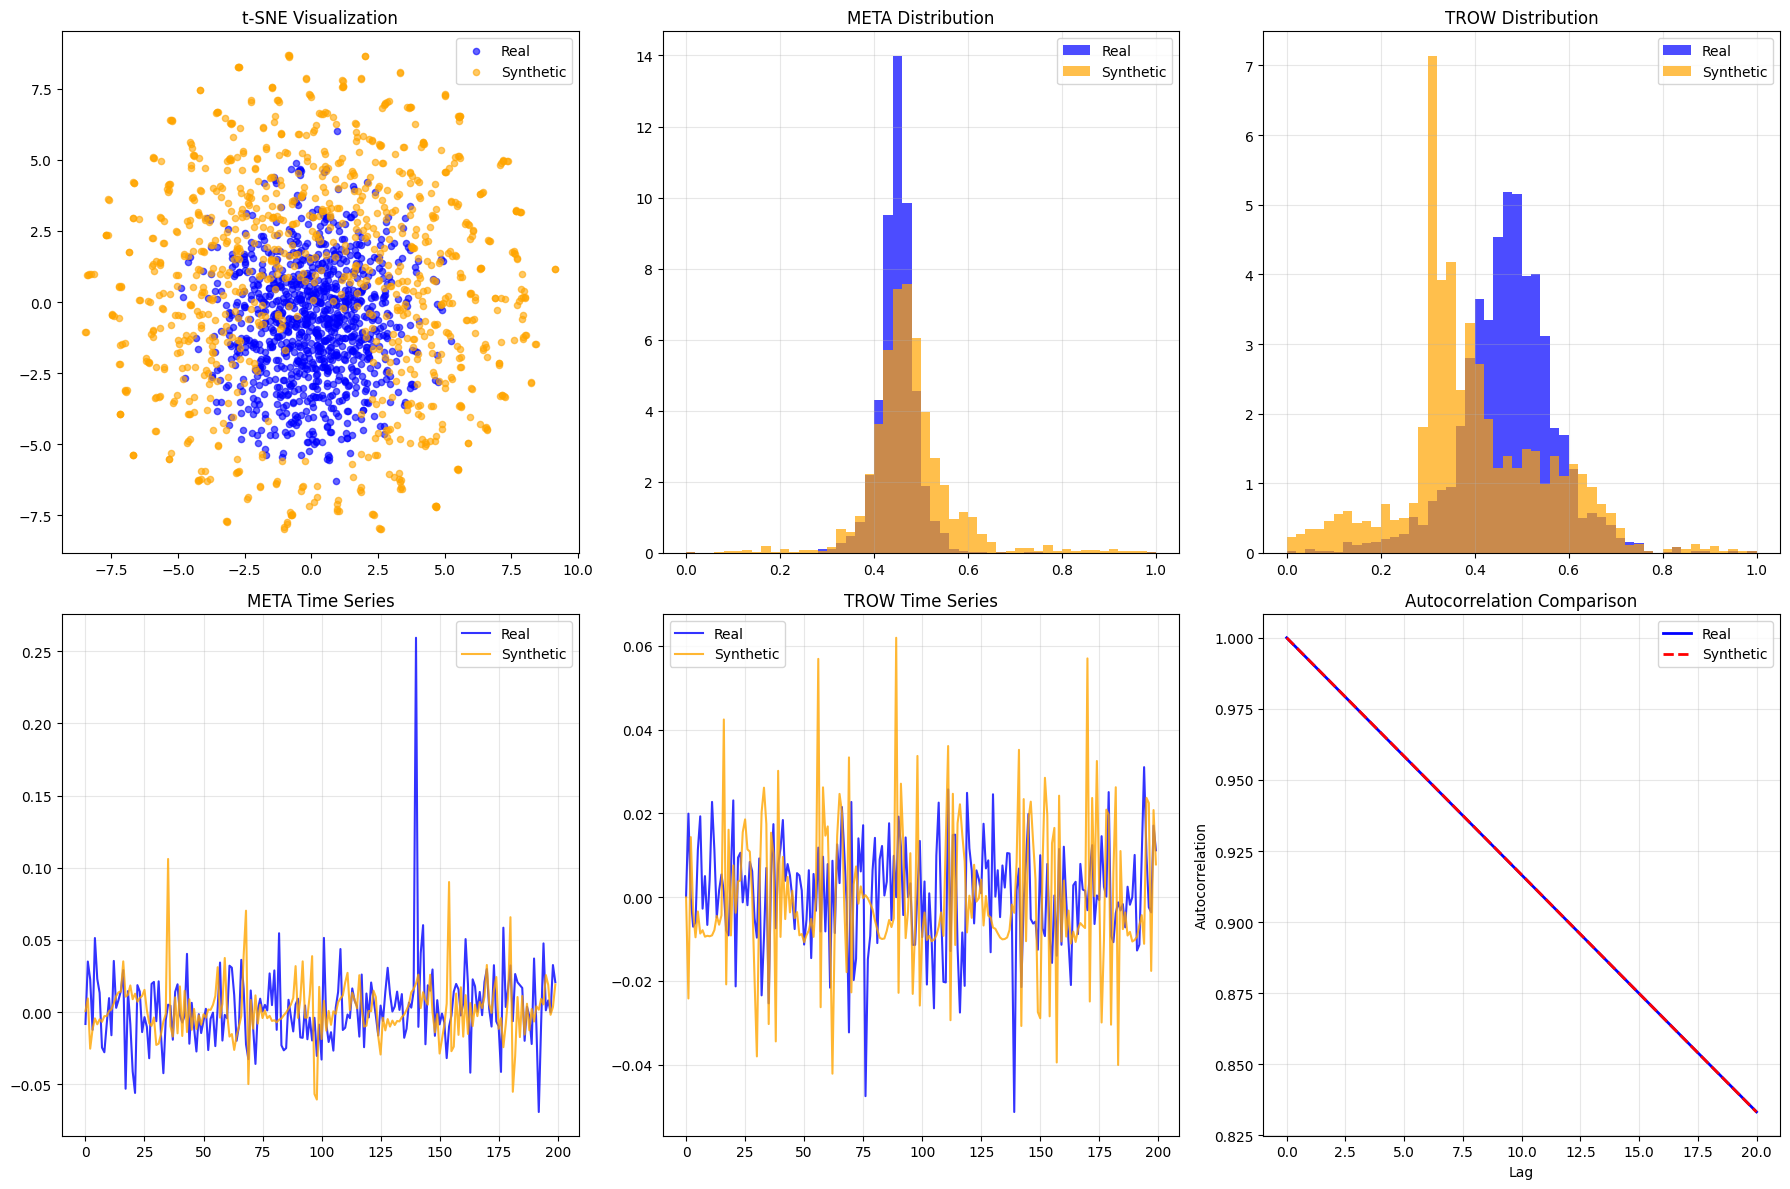


TSGBench EVALUATION RESULTS SUMMARY

MODEL-BASED MEASURES:
  Discriminative Score (DS):     0.5043 ± 0.0212
  Predictive Score (PS):         0.1136 ± 0.0133
  Contextual-FID (C-FID):        0.0119

FEATURE-BASED MEASURES:
  Marginal Distribution Diff:    0.6988
  AutoCorrelation Difference:    0.0514
  Skewness Difference:           0.3856
  Kurtosis Difference:           10.2689

DISTANCE-BASED MEASURES:
  Euclidean Distance:            2.4501
  Dynamic Time Warping:          8.9235

INTERPRETATION:
  - Lower values indicate better performance
  - DS and PS around 0.5 suggest the discriminator cannot distinguish real from synthetic
  - Feature-based measures assess statistical similarity
  - Distance-based measures provide direct similarity quantification


In [ ]:
# Run the evaluation
results, real_norm, synth_norm = run_complete_tsgbench_evaluation(
    'SP500_data_fixed.xlsx',
    'synthetic_data_BOTH.xlsx',
    window_length=120
)

# Print summary
print_results_summary(results)
